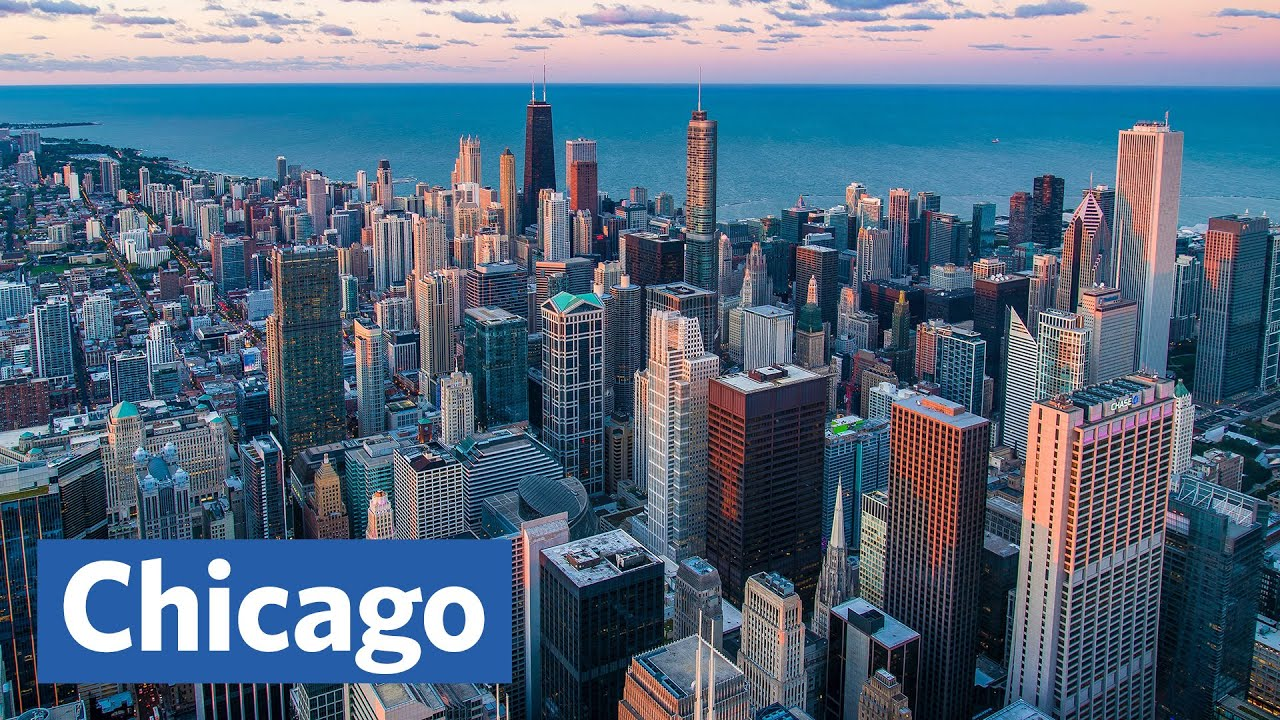

# Problem Statement

- Image Source: https://commons.wikimedia.org/wiki/File:Chicago_skyline,_viewed_from_John_Hancock_Center.jpg
- The Chicago Crime dataset contains a summary of the reported crimes occurred in the City of Chicago from 2001 to 2017. 
- Dataset has been obtained from the Chicago Police Department's CLEAR (Citizen Law Enforcement Analysis and Reporting) system.
- Dataset contains the following columns: 
    - ID: Unique identifier for the record.
    - Case Number: The Chicago Police Department RD Number (Records Division Number), which is unique to the incident.
    - Date: Date when the incident occurred.
    - Block: address where the incident occurred
    - IUCR: The Illinois Unifrom Crime Reporting code.
    - Primary Type: The primary description of the IUCR code.
    - Description: The secondary description of the IUCR code, a subcategory of the primary description.
    - Location Description: Description of the location where the incident occurred.
    - Arrest: Indicates whether an arrest was made.
    - Domestic: Indicates whether the incident was domestic-related as defined by the Illinois Domestic Violence Act.
    - Beat: Indicates the beat where the incident occurred. A beat is the smallest police geographic area – each beat has a dedicated police beat car. 
    - District: Indicates the police district where the incident occurred. 
    - Ward: The ward (City Council district) where the incident occurred. 
    - Community Area: Indicates the community area where the incident occurred. Chicago has 77 community areas. 
    - FBI Code: Indicates the crime classification as outlined in the FBI's National Incident-Based Reporting System (NIBRS). 
    - X Coordinate: The x coordinate of the location where the incident occurred in State Plane Illinois East NAD 1983 projection. 
    - Y Coordinate: The y coordinate of the location where the incident occurred in State Plane Illinois East NAD 1983 projection. 
    - Year: Year the incident occurred.
    - Updated On: Date and time the record was last updated.
    - Latitude: The latitude of the location where the incident occurred. This location is shifted from the actual location for partial redaction but falls on the same block.
    - Longitude: The longitude of the location where the incident occurred. This location is shifted from the actual location for partial redaction but falls on the same block.
    - Location: The location where the incident occurred in a format that allows for creation of maps and other geographic operations on this data portal. This location is shifted from the actual location for partial redaction but falls on the same block.
- Datasource: https://www.kaggle.com/currie32/crimes-in-chicago

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
from fbprophet import Prophet

In [4]:
chicago_df1 = pd.read_csv('Chicago_Crimes_2001_to_2004.csv',error_bad_lines=False)
chicago_df2 = pd.read_csv('Chicago_Crimes_2005_to_2007.csv',error_bad_lines=False)
chicago_df3 = pd.read_csv('Chicago_Crimes_2008_to_2011.csv',error_bad_lines=False)
chicago_df4 = pd.read_csv('Chicago_Crimes_2012_to_2017.csv',error_bad_lines=False)

b'Skipping line 1513591: expected 23 fields, saw 24\n'
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (17,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
b'Skipping line 533719: expected 23 fields, saw 24\n'
b'Skipping line 1149094: expected 23 fields, saw 41\n'


In [5]:
chicago_df1.shape

(1923515, 23)

In [6]:
chicago_df2.shape

(1872343, 23)

In [7]:
chicago_df3.shape

(2688710, 23)

In [8]:
chicago_df4.shape

(1456714, 23)

In [9]:
chicago_df = pd.concat([chicago_df1,chicago_df2,chicago_df3,chicago_df4])

In [10]:
chicago_df.shape

(7941282, 23)

In [11]:
chicago_df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,879,4786321,HM399414,01/01/2004 12:01:00 AM,082XX S COLES AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,...,7.0,46.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
1,2544,4676906,HM278933,03/01/2003 12:00:00 AM,004XX W 42ND PL,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,11.0,61.0,26,1173974.0,1.87676e+06,2003.0,04/15/2016 08:55:02 AM,41.8172,-87.637328,"(41.817229156, -87.637328162)"
2,2919,4789749,HM402220,06/20/2004 11:00:00 AM,025XX N KIMBALL AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,...,35.0,22.0,20,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
3,2927,4789765,HM402058,12/30/2004 08:00:00 PM,045XX W MONTANA ST,0840,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,...,31.0,20.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
4,3302,4677901,HM275615,05/01/2003 01:00:00 AM,111XX S NORMAL AVE,0841,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,...,34.0,49.0,06,1174948.0,1.83105e+06,2003.0,04/15/2016 08:55:02 AM,41.6918,-87.635116,"(41.691784636, -87.635115968)"


In [12]:
chicago_df.columns

Index(['Unnamed: 0', 'ID', 'Case Number', 'Date', 'Block', 'IUCR',
       'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

In [13]:
chicago_df.isnull().sum()

Unnamed: 0                   0
ID                           0
Case Number                  7
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description      1990
Arrest                       0
Domestic                     0
Beat                         0
District                    91
Ward                    700224
Community Area          702091
FBI Code                     0
X Coordinate            105573
Y Coordinate            105573
Year                         0
Updated On                   0
Latitude                105573
Longitude               105574
Location                105574
dtype: int64

So we have null values in 8 of our coloumns

In [14]:
#LETS DROP THESE COLUMNS AS THEY DONOT HAVE AS SUCH AN EFFECT ON THE RATE OF THE CRIMES AND ALL SUCH COLUMNS WILL BE DROPPED.

In [15]:
chicago_df.drop(['Unnamed: 0', 'ID', 'Case Number','X Coordinate', 'Y Coordinate','Latitude','Longitude', 'Location','FBI Code','Location Description','Ward','Community Area'],inplace=True,axis=1)

In [16]:
chicago_df.drop('District',inplace=True,axis=1)

In [17]:
chicago_df.isnull().sum()

Date            0
Block           0
IUCR            0
Primary Type    0
Description     0
Arrest          0
Domestic        0
Beat            0
Year            0
Updated On      0
dtype: int64

In [18]:
chicago_df.head()

,Date,Block,IUCR,Primary Type,Description,Arrest,Domestic,Beat,Year,Updated On
0,01/01/2004 12:01:00 AM,082XX S COLES AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,False,False,424,2004.0,08/17/2015 03:03:40 PM
1,03/01/2003 12:00:00 AM,004XX W 42ND PL,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,False,True,935,2003.0,04/15/2016 08:55:02 AM
2,06/20/2004 11:00:00 AM,025XX N KIMBALL AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,False,False,1413,2004.0,08/17/2015 03:03:40 PM
3,12/30/2004 08:00:00 PM,045XX W MONTANA ST,0840,THEFT,FINANCIAL ID THEFT: OVER $300,False,False,2521,2004.0,08/17/2015 03:03:40 PM
4,05/01/2003 01:00:00 AM,111XX S NORMAL AVE,0841,THEFT,FINANCIAL ID THEFT:$300 &UNDER,False,False,2233,2003.0,04/15/2016 08:55:02 AM


In [19]:
chicago_df.Date = pd.to_datetime(chicago_df.Date,format = '%m/%d/%Y %I:%M:%S %p')

In [20]:
chicago_df['Date']

0         2004-01-01 00:01:00
1         2003-03-01 00:00:00
2         2004-06-20 11:00:00
3         2004-12-30 20:00:00
4         2003-05-01 01:00:00
                  ...        
1456709   2016-05-03 23:33:00
1456710   2016-05-03 23:30:00
1456711   2016-05-03 00:15:00
1456712   2016-05-03 21:07:00
1456713   2016-05-03 23:38:00
Name: Date, Length: 7941282, dtype: datetime64[ns]

In [32]:
chicago_df.index = pd.DatetimeIndex(chicago_df.Date)

In [34]:
#now our dataframe has the index equal to dates:
chicago_df.head()

,Date,Block,IUCR,Primary Type,Description,Arrest,Domestic,Beat,Year,Updated On
Date,,,,,,,,,,
2004-01-01 00:01:00,2004-01-01 00:01:00,082XX S COLES AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,False,False,424,2004.0,08/17/2015 03:03:40 PM
2003-03-01 00:00:00,2003-03-01 00:00:00,004XX W 42ND PL,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,False,True,935,2003.0,04/15/2016 08:55:02 AM
2004-06-20 11:00:00,2004-06-20 11:00:00,025XX N KIMBALL AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,False,False,1413,2004.0,08/17/2015 03:03:40 PM
2004-12-30 20:00:00,2004-12-30 20:00:00,045XX W MONTANA ST,0840,THEFT,FINANCIAL ID THEFT: OVER $300,False,False,2521,2004.0,08/17/2015 03:03:40 PM
2003-05-01 01:00:00,2003-05-01 01:00:00,111XX S NORMAL AVE,0841,THEFT,FINANCIAL ID THEFT:$300 &UNDER,False,False,2233,2003.0,04/15/2016 08:55:02 AM


In [21]:
chicago_df['Primary Type'].value_counts()

THEFT                                1640506
BATTERY                              1442716
CRIMINAL DAMAGE                       923000
NARCOTICS                             885431
OTHER OFFENSE                         491922
ASSAULT                               481661
BURGLARY                              470958
MOTOR VEHICLE THEFT                   370548
ROBBERY                               300453
DECEPTIVE PRACTICE                    280931
CRIMINAL TRESPASS                     229366
PROSTITUTION                           86401
WEAPONS VIOLATION                      77429
PUBLIC PEACE VIOLATION                 58548
OFFENSE INVOLVING CHILDREN             51441
CRIM SEXUAL ASSAULT                    29868
SEX OFFENSE                            28707
GAMBLING                               18806
LIQUOR LAW VIOLATION                   17513
INTERFERENCE WITH PUBLIC OFFICER       15710
ARSON                                  13097
HOMICIDE                                9051
KIDNAPPING

Lets do some data visualisation!

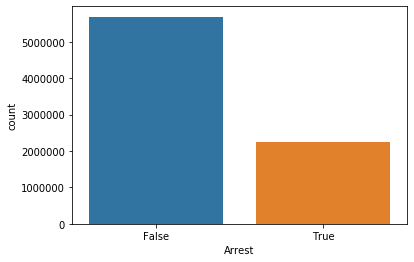

In [41]:
sns.countplot(chicago_df['Arrest'])

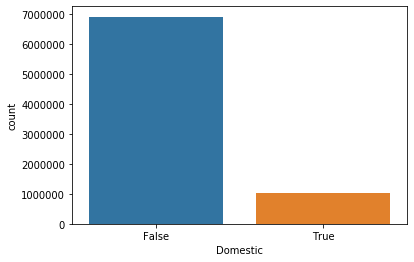

In [42]:
sns.countplot(chicago_df['Domestic'])

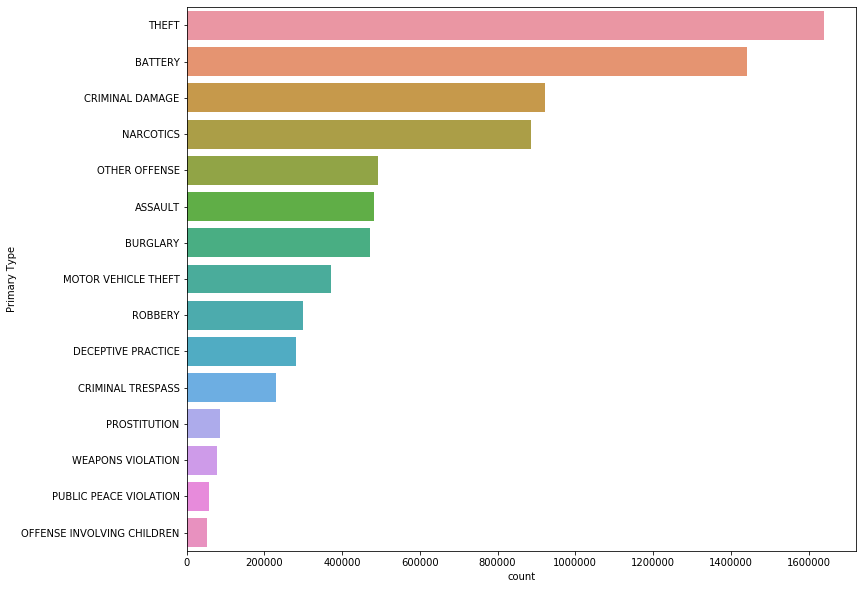

In [26]:
plt.figure(figsize=(12,10))
sns.countplot(y='Primary Type',data=chicago_df,order = chicago_df['Primary Type'].value_counts().iloc[:15].index)

In [35]:
chicago_df.resample('Y').size()
#So here listing the frequency of cases per year.

Date
2001-12-31    568518
2002-12-31    490879
2003-12-31    475913
2004-12-31    388205
2005-12-31    455811
2006-12-31    794684
2007-12-31    621848
2008-12-31    852053
2009-12-31    783900
2010-12-31    700691
2011-12-31    352066
2012-12-31    335670
2013-12-31    306703
2014-12-31    274527
2015-12-31    262995
2016-12-31    265462
2017-12-31     11357
Freq: A-DEC, dtype: int64

In [ ]:
#remember plt.plot gives us the curve plot for frequency..

Text(0, 0.5, 'Crime Cases')

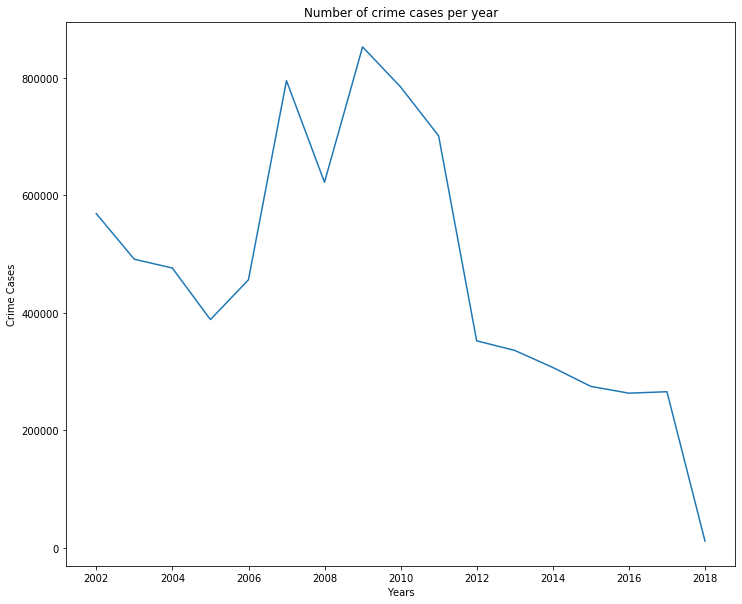

In [37]:
plt.figure(figsize=(12,10))
plt.plot(chicago_df.resample('Y').size())
plt.title('Number of crime cases per year')
plt.xlabel('Years')
plt.ylabel('Crime Cases')

Now we can see that the number of crime cases peaked in between 2006 - 2009 . However the cases constantly reduced from 2009 to 2018. 2018 saw the lowest cases in the 2 decades!

Text(0, 0.5, 'Crime Cases')

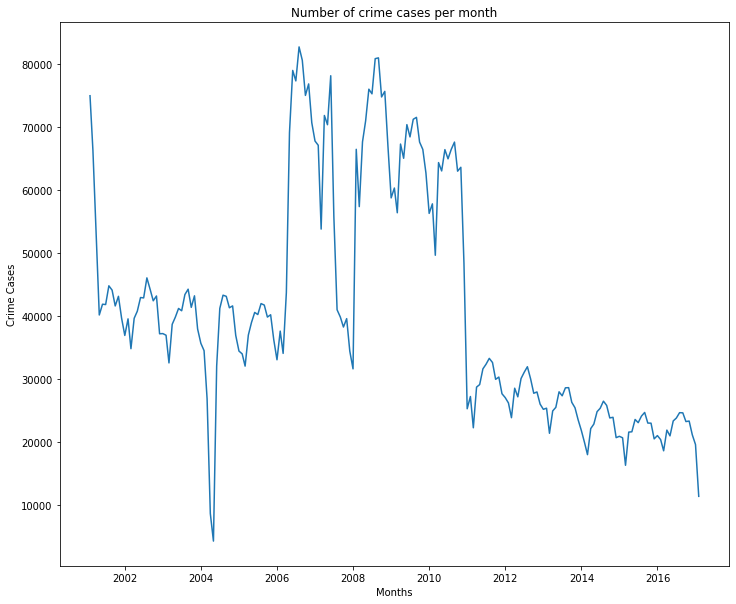

In [39]:
plt.figure(figsize=(12,10))
plt.plot(chicago_df.resample('M').size())
plt.title('Number of crime cases per month')
plt.xlabel('Months')
plt.ylabel('Crime Cases')

There is a trend in the rise of crimes. In the early months, the cases are less but as the year aprroaches to mid months, the frequency of cases take a peak. As the year ends, it again goes down to the minimum of whole year!

# Preparing the Data

In [43]:
chicago_prophet = chicago_df.resample('M').size().reset_index()

In [52]:
chicago_prophet.columns = ['Date','Crime Count']

In [56]:
chicago_prophet.sort_values('Crime Count',ascending=False,inplace=True)

In [62]:
chicago_prophet

,Date,Crime Count
66,2006-07-31,82750
91,2008-08-31,81009
90,2008-07-31,80885
67,2006-08-31,80628
64,2006-05-31,79013
...,...,...
157,2014-02-28,17977
169,2015-02-28,16287
192,2017-01-31,11357
38,2004-03-31,8624


This is the month wise cases for all years!!

In [63]:
chicago_prophet_df_final = chicago_prophet.rename(columns={'Date':'ds','Crime Count':'y'}) 

In [64]:
chicago_prophet_df_final

,ds,y
66,2006-07-31,82750
91,2008-08-31,81009
90,2008-07-31,80885
67,2006-08-31,80628
64,2006-05-31,79013
...,...,...
157,2014-02-28,17977
169,2015-02-28,16287
192,2017-01-31,11357
38,2004-03-31,8624


# Lets apply FB Prophet!

In [65]:
pr = Prophet()

In [66]:
pr.fit(chicago_prophet_df_final)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [81]:
future = pr.make_future_dataframe(periods=1095)
forecast = pr.predict(future)

In [82]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2001-01-31,40566.629556,22944.318290,54309.788555,40566.629556,40566.629556,-1575.734232,-1575.734232,-1575.734232,-1575.734232,-1575.734232,-1575.734232,0.0,0.0,0.0,38990.895324
1,2001-02-28,40713.928301,18399.816140,49207.404904,40713.928301,40713.928301,-6454.460910,-6454.460910,-6454.460910,-6454.460910,-6454.460910,-6454.460910,0.0,0.0,0.0,34259.467390
2,2001-03-31,40877.009054,22778.538708,55168.012393,40877.009054,40877.009054,-2068.126492,-2068.126492,-2068.126492,-2068.126492,-2068.126492,-2068.126492,0.0,0.0,0.0,38808.882561
3,2001-04-30,41034.829137,23904.904686,56183.919641,41034.829137,41034.829137,-1473.320415,-1473.320415,-1473.320415,-1473.320415,-1473.320415,-1473.320415,0.0,0.0,0.0,39561.508722
4,2001-05-31,41197.909890,29248.741966,60504.555424,41197.909890,41197.909890,3883.120316,3883.120316,3883.120316,3883.120316,3883.120316,3883.120316,0.0,0.0,0.0,45081.030206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1283,2020-01-27,-1074.506719,-20667.792989,11045.586646,-2749.535034,561.197020,-3788.044578,-3788.044578,-3788.044578,-3788.044578,-3788.044578,-3788.044578,0.0,0.0,0.0,-4862.551296
1284,2020-01-28,-1088.493038,-20870.205432,10536.465774,-2765.715509,548.358836,-3086.480993,-3086.480993,-3086.480993,-3086.480993,-3086.480993,-3086.480993,0.0,0.0,0.0,-4174.974031
1285,2020-01-29,-1102.479356,-19480.455120,11424.582342,-2781.895985,535.520652,-2487.314891,-2487.314891,-2487.314891,-2487.314891,-2487.314891,-2487.314891,0.0,0.0,0.0,-3589.794247
1286,2020-01-30,-1116.465675,-17967.496888,12352.748055,-2798.076460,522.682468,-2017.367149,-2017.367149,-2017.367149,-2017.367149,-2017.367149,-2017.367149,0.0,0.0,0.0,-3133.832825


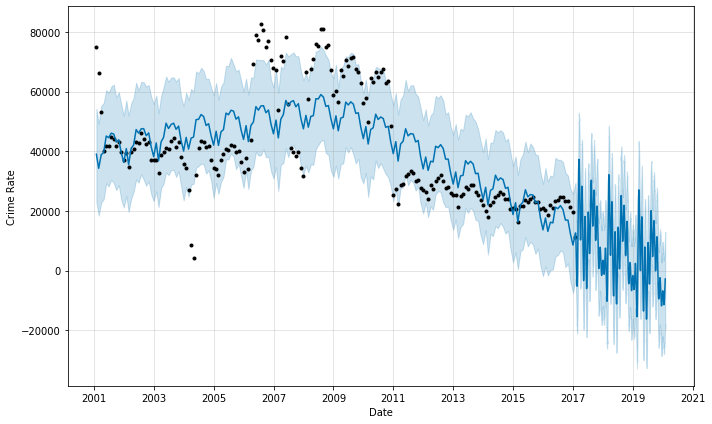

In [83]:
figure = pr.plot(forecast,xlabel='Date',ylabel='Crime Rate')

# Great!

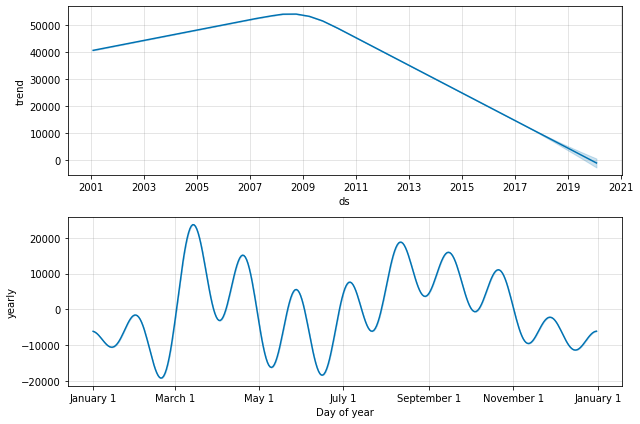

In [84]:
figuree = pr.plot_components(forecast)

This is the seasonality trends

# So we have predicted the crime rates for the next 3 years from 2018!

The crime rate will decrease with a steady slope in next 3 years of Chicago! :)